<a href="https://colab.research.google.com/github/SenaKymk/naive_bayes_YZM212_lab/blob/main/naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
# veriyi içe aktarılır
veri = pd.read_csv("/content/diabetes_veri_temiz.csv")
#verinin ilk 5 satırını gösterir
veri.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


In [40]:
# Hedef değişkeni belirle
X = veri.drop(columns=["Outcome"])  # Bağımsız değişkenler
y = veri["Outcome"]  # Bağımlı değişken (1: Diyabet var, 0: Yok)

# %80 eğitim, %20 test olacak şekilde ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Modeli oluştur
gnb = GaussianNB()


In [42]:
# Eğitim süresini ölç
start_time = time.time()
gnb.fit(X_train, y_train)
train_time = time.time() - start_time


In [43]:
# Test süresini ölç
start_time = time.time()
y_pred = gnb.predict(X_test)
test_time = time.time() - start_time


In [44]:
# Performans değerlendirmesi
print("Karmaşıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Karmaşıklık Matrisi:
 [[79 20]
 [18 37]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



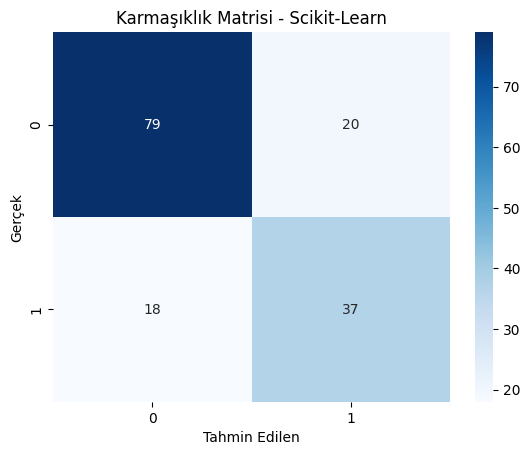

Eğitim süresi: 0.0062 saniye
Test süresi: 0.0025 saniye


In [31]:
# Görselleştirme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matrisi - Scikit-Learn")
plt.show()

print(f"Eğitim süresi: {train_time:.4f} saniye")
print(f"Test süresi: {test_time:.4f} saniye")


In [32]:
class MyGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.stds = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.stds[c] = np.std(X_c, axis=0) + 1e-6  # Bölme hatasını önlemek için epsilon ekliyoruz
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.means[class_idx]
        std = self.stds[class_idx]
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))


In [33]:
# Modeli eğit
nb = MyGaussianNB()
start_time = time.time()
nb.fit(X_train.to_numpy(), y_train.to_numpy())
train_time_custom = time.time() - start_time


In [34]:
# Tahmin yap
start_time = time.time()
y_pred_custom = nb.predict(X_test.to_numpy())
test_time_custom = time.time() - start_time


Özel Naive Bayes - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Özel Naive Bayes - Eğitim Süresi: 0.0018 saniye
Özel Naive Bayes - Test Süresi: 0.0176 saniye


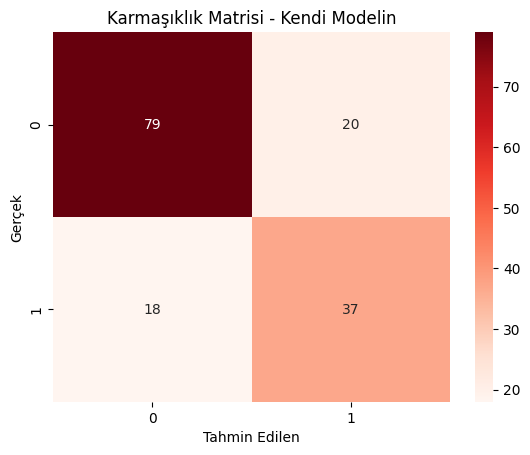

In [36]:
# Performans analizi
print("\nÖzel Naive Bayes - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_custom))

sns.heatmap(confusion_matrix(y_test, y_pred_custom), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matrisi - Kendi Modelin")
print(f"Özel Naive Bayes - Eğitim Süresi: {train_time_custom:.4f} saniye")
print(f"Özel Naive Bayes - Test Süresi: {test_time_custom:.4f} saniye")
plt.show()